In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical



In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)



In [3]:
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
# Define the CNN model
def build_cnn(optimizer):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model 
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



In [21]:
# Train and evaluate the model for each optimizer
optimizers = ['Adam', 'SGD', 'RMSprop']
history_list=[]
for i,opt in enumerate(optimizers):
    print(f"\nTraining model with {opt} optimizer:")
    
    model = build_cnn(opt)
    history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'\nTest accuracy with {opt} optimizer: {test_acc}')
    history_list.append(history)


Training model with Adam optimizer:
Epoch 1/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5362 - accuracy: 0.4400 - val_loss: 1.3340 - val_accuracy: 0.5169
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1769 - accuracy: 0.5859 - val_loss: 1.0797 - val_accuracy: 0.6133
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0270 - accuracy: 0.6383 - val_loss: 1.0433 - val_accuracy: 0.6290
Epoch 4/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9348 - accuracy: 0.6728 - val_loss: 0.9342 - val_accuracy: 0.6709
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.9116 - accuracy: 0.6845

Test accuracy with Adam optimizer: 0.684499979019165

Training model with SGD optimizer:
Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 2.0419 - accuracy: 0.2522 - val_loss: 1.8674 - val_accuracy: 0.3187
Epoch 2/5
1563/1563 [============================

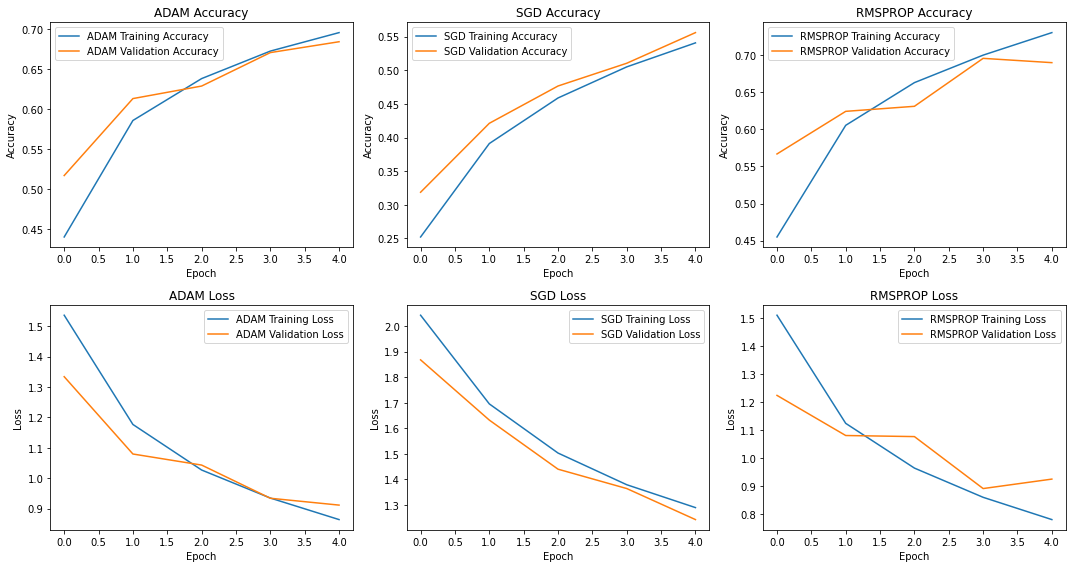

In [22]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot training and validation accuracy over epochs
for i, opt in enumerate(optimizers):
    axes[0, i].plot(history_list[i].history['accuracy'], label=f'{opt} Training Accuracy')
    axes[0, i].plot(history_list[i].history['val_accuracy'], label=f'{opt} Validation Accuracy')
    axes[0, i].set_title(f'{opt} Accuracy')
    axes[0, i].set_xlabel('Epoch')
    axes[0, i].set_ylabel('Accuracy')
    axes[0, i].legend()

# Plot training and validation loss over epochs
for i, opt in enumerate(optimizers):
    axes[1, i].plot(history_list[i].history['loss'], label=f'{opt} Training Loss')
    axes[1, i].plot(history_list[i].history['val_loss'], label=f'{opt} Validation Loss')
    axes[1, i].set_title(f'{opt} Loss')
    axes[1, i].set_xlabel('Epoch')
    axes[1, i].set_ylabel('Loss')
    axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


